# Final Project(NoSQL)

In [3]:
%matplotlib inline
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
from bson import json_util, ObjectId
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
import numpy as np
import requests
import json, os
import configparser
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import random
import pprint
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

The way I am doing my NoSQL dataset is normalized data model. I store the relationships between data by including links or references from one document to another. Applications can resolve these references to access the related data. These are normalized data models. The reason why I am using this is because embedded data models will embeds results in duplication of data, but would not provide sufficient read performance advantages to outweigh the implications of the duplication.

How I convert my SQL database to NoSQL database

In [20]:
client = MongoClient('localhost', 27017)

In [21]:
db=client.tweets
collection=db.tweets

In [25]:
db.collection_names(include_system_collections=False)

['tweets', 'gentags', 'pokemon', 'tags']

In [5]:
try:
    result = db.tweets.drop()
    print ("analytics tweets dropped")
except:
    pass

analytics tweets dropped


In [6]:
def load_csv(csv):
    p=os.path.join("data/", csv)
    print (p)
    data=pd.read_csv(p, encoding = "ISO-8859-1", engine='python')
    return data

First, we need to export the csv file from SQL database, and them convert them into json, and insert them into MongoDB

In [7]:
tweets_csv=load_csv('/Users/tianchenglin/Desktop/pokemon_tweets.csv')
tweets_csv.head()

/Users/tianchenglin/Desktop/pokemon_tweets.csv


,screen_name,created_at,text
0,Nikkowolf,2018-04-07 22:07:08,Oh my frog how freaking cute is he?!? #1 #bulb...
1,Nutmegs_Mix,2018-04-07 20:55:57,what have I come to? \nðððð\n#pops...
2,atanak74,2018-04-07 19:22:16,RT @SDahlingerArt: What's your favorite pose? ...
3,SDahlingerArt,2018-04-07 19:13:06,What's your favorite pose? \n\n#bulbasaur #pok...
4,RicanRider05,2018-04-07 17:52:53,#Red #Charmander #Bulbasaur #Squirtle #Pokemon...


In [8]:
tweets_j=json.loads(tweets_csv.to_json(orient='records'))
tweets_j[0]

{'created_at': '2018-04-07 22:07:08',
 'screen_name': 'Nikkowolf',
 'text': 'Oh my frog how freaking cute is he?!? #1 #bulbasaur #pokemongo #washingtondc #wolfonthetownâ\x80¦ https://t.co/Zw6RBeRcnq'}

In [9]:
print(tweets_j[0]['text'])

Oh my frog how freaking cute is he?!? #1 #bulbasaur #pokemongo #washingtondc #wolfonthetownâ¦ https://t.co/Zw6RBeRcnq


In [10]:
def tweet_json(tid,text,created):
    j={
    "screenname" : tid,
    "created_at" : created,
    "text" : text}
    return j

In [11]:
# Twitter dates are of the form Sun Mar 15 21:41:54 +0000 2015
datestrings=['Sun Mar 15 21:41:54 +0000 2015','Tue Mar 29 08:11:25 +0000 2011']
datestringsTwo=['2018-02-23 23:49:32','2018-02-23 23:49:32']
from datetime import timedelta
from email.utils import parsedate_tz
from dateutil.parser import parse

def to_datetime(datestring):   
    time_tuple = parse(datestring.strip())   
    dt = datetime.strptime(datestring.strip(), '%Y-%m-%d %H:%M:%S') 
    return dt

ts=to_datetime(datestringsTwo[0])
print (ts.strftime("%Y-%m-%d %H:%M"))
ts=to_datetime(datestringsTwo[1])
print (ts.strftime("%Y-%m-%d %H:%M"))

2018-02-23 23:49
2018-02-23 23:49


In [12]:
cnt=0
for tweet in tweets_j:
    ts=datetime.now()
    try:
        ts=to_datetime(tweet['created_at'])
    except:
        continue     
    try:
        j=tweet_json(tweet['screen_name'],tweet['text'],ts)
        result = db.tweets.insert_one(j)
        cnt+=1
    except:
        pass       
print ("%d tweets inserted."%cnt)

1016 tweets inserted.


In [13]:
for tweet in db.tweets.find():
    pprint.pprint(tweet)

{'_id': ObjectId('5acabcd961c88f1855ae2bc8'),
 'created_at': datetime.datetime(2018, 4, 7, 22, 7, 8),
 'screenname': 'Nikkowolf',
 'text': 'Oh my frog how freaking cute is he?!? #1 #bulbasaur #pokemongo '
         '#washingtondc #wolfonthetownâ\x80¦ https://t.co/Zw6RBeRcnq'}
{'_id': ObjectId('5acabcd961c88f1855ae2bc9'),
 'created_at': datetime.datetime(2018, 4, 7, 20, 55, 57),
 'screenname': 'Nutmegs_Mix',
 'text': 'what have I come to? \n'
         'ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82\n'
         '#popsocket #pokemon #bulbasaur @ Toys"R"Us https://t.co/jGfzg6N4EF'}
{'_id': ObjectId('5acabcd961c88f1855ae2bca'),
 'created_at': datetime.datetime(2018, 4, 7, 19, 22, 16),
 'screenname': 'atanak74',
 'text': "RT @SDahlingerArt: What's your favorite pose? \n"
         '\n'
         '#bulbasaur #pokemon https://t.co/6M1qjWEyCR'}
{'_id': ObjectId('5acabcd961c88f1855ae2bcb'),
 'created_at': datetime.datetime(2018, 4, 7, 19, 13, 6),
 'screenname': 'SDahlingerArt',
 'text': "What

 'screenname': 'GGoku7',
 'text': 'RT @hemlocktheroyal: ð\x9f\x8e®one level at a time. #Pokemon '
         '#pikachu #pichu #charmander #bulbasaur #squirtle #red #levelup '
         '#living #life https://t.â\x80¦'}
{'_id': ObjectId('5acabcd961c88f1855ae2bf1'),
 'created_at': datetime.datetime(2018, 4, 6, 0, 10, 22),
 'screenname': 'Tobe_Gaming',
 'text': 'NEW VIDEO ALERT... Ok so #pokemon series is a go... the journey to '
         '#catchemall starts!\n'
         '\n'
         'https://t.co/tXyHR1eSHMâ\x80¦ https://t.co/cCGXpT81aJ'}
{'_id': ObjectId('5acabcd961c88f1855ae2bf2'),
 'created_at': datetime.datetime(2018, 4, 5, 22, 38, 29),
 'screenname': 'CR_Nekitou',
 'text': "Sorry I'm late! Here's plans for #Bulbasaur and #Squirtle stickers!\n"
         '#nekitousnintenporium https://t.co/G1KjMy3qYr'}
{'_id': ObjectId('5acabcd961c88f1855ae2bf3'),
 'created_at': datetime.datetime(2018, 4, 5, 21, 57, 20),
 'screenname': 'CandyGam3r',
 'text': 'Pick up one of my brand NEW prints for $12 e

 'screenname': 'Realli_Dubious',
 'text': 'Tha #Charmander #family #Pokemon https://t.co/lPOWQhdN1o'}
{'_id': ObjectId('5acabcd961c88f1855ae2c6c'),
 'created_at': datetime.datetime(2018, 4, 4, 20, 44, 18),
 'screenname': 'Realli_Dubious',
 'text': '#Darth Blazie #Charmander #Sith\n'
         '#Pokemon #starwars https://t.co/olHKMtA41B'}
{'_id': ObjectId('5acabcd961c88f1855ae2c6d'),
 'created_at': datetime.datetime(2018, 4, 4, 20, 39, 26),
 'screenname': 'rbrosemer',
 'text': 'RT @Alfonzowords: '
         'ð\x9f\x8e\x89ð\x9f\x98\xadð\x9f\x98\x8dð\x9f¤¤Finally got my fave '
         'pokemon #Charmander\n'
         'Arigato @snapchat &amp; @Bitmoji '
         'ð\x9f\x99\x8cð\x9f¤\x97ð\x9f\x91\x8a\n'
         '#PokemonSelfie \n'
         'ð\x9f\x8e¶Chamanders are Red,â\x80¦'}
{'_id': ObjectId('5acabcd961c88f1855ae2c6e'),
 'created_at': datetime.datetime(2018, 4, 4, 20, 12, 8),
 'screenname': 'KarensStories',
 'text': 'RT @Alfonzowords: '
         'ð\x9f\x8e\x89ð\x9f\x98\xadð\x9f\x98\x8dð\

 'created_at': datetime.datetime(2018, 4, 2, 16, 23, 48),
 'screenname': 'CoordsPokemon',
 'text': 'RT @PokeXCoords: 28.476435, -81.468999\n'
         '#Ditto #Pidgey\n'
         '#PokeXCoords \n'
         '#PokemonGo'}
{'_id': ObjectId('5acabcd961c88f1855ae2cef'),
 'created_at': datetime.datetime(2018, 4, 2, 16, 23, 32),
 'screenname': 'PokeXCoords',
 'text': '28.476435, -81.468999\n#Ditto #Pidgey\n#PokeXCoords \n#PokemonGo'}
{'_id': ObjectId('5acabcd961c88f1855ae2cf0'),
 'created_at': datetime.datetime(2018, 4, 1, 18, 44, 3),
 'screenname': 'PokeXCoords',
 'text': '40.763660,-73.977364 \n#Ditto (#pidgey)\n#PokeXCoords \n#PokemonGo'}
{'_id': ObjectId('5acabcd961c88f1855ae2cf1'),
 'created_at': datetime.datetime(2018, 4, 1, 15, 20, 19),
 'screenname': 'OhheyitsCasssie',
 'text': 'Happy Easter! ð\x9f\x90°\n'
         '#Easter #PokemonGO #AR #EasterEggs #Pidgey https://t.co/5VCLVwPjO7'}
{'_id': ObjectId('5acabcd961c88f1855ae2cf2'),
 'created_at': datetime.datetime(2018, 4, 1, 13, 3, 53),

 'text': 'RT @DidiG18: #StartSpreadingtheNews yankees win great start by '
         'â\x98\x80ï¸\x8f going 6strong ... '
         'ð\x9f\x94¥ð\x9f\x94¥bullpenð\x9f\x94¥ð\x9f\x94¥ offense all around '
         'great game ... ð\x9f\x91¨ð\x9f\x8f½â\x80\x8dâ\x9a\x96ï¸\x8f ð\x9f¤¡ '
         'aâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2d73'),
 'created_at': datetime.datetime(2018, 4, 7, 22, 48, 45),
 'screenname': 'lewisjoseph13',
 'text': 'RT @DidiG18: #StartSpreadingtheNews yankees win great start by '
         'â\x98\x80ï¸\x8f going 6strong ... '
         'ð\x9f\x94¥ð\x9f\x94¥bullpenð\x9f\x94¥ð\x9f\x94¥ offense all around '
         'great game ... ð\x9f\x91¨ð\x9f\x8f½â\x80\x8dâ\x9a\x96ï¸\x8f ð\x9f¤¡ '
         'aâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2d74'),
 'created_at': datetime.datetime(2018, 4, 7, 22, 48, 43),
 'screenname': 'Deathofwar90',
 'text': 'RT @Prawnheart: #pikachu #pokemon https://t.co/YP8AIb8QSi'}
{'_id': ObjectId('5acabcda61c88f1855ae2d75'),
 'created_at'

 'created_at': datetime.datetime(2018, 3, 30, 23, 29, 38),
 'screenname': 'treeckobot',
 'text': 'Ahhhhh yeeeeah! \n#SuperSmashBros #Jigglypuff'}
{'_id': ObjectId('5acabcda61c88f1855ae2df9'),
 'created_at': datetime.datetime(2018, 3, 30, 23, 6, 37),
 'screenname': 'tremendolatino',
 'text': 'RT @doncellasuicide: '
         'ð\x9f\x8d\x91https://t.co/rQ9NR7axtnð\x9f\x8d\x91\n'
         'Pokemon crop tops are always fun! Get this full UNCENSORED video in '
         'my Patreon, avaliable onâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2dfa'),
 'created_at': datetime.datetime(2018, 3, 30, 20, 14, 36),
 'screenname': 'GotPeePs',
 'text': '"Jigglypuff" by poolboy https://t.co/f71WjLm7J3 #jigglypuff #pokemon '
         '#animegirl #digitalpainting'}
{'_id': ObjectId('5acabcda61c88f1855ae2dfb'),
 'created_at': datetime.datetime(2018, 3, 30, 19, 46, 57),
 'screenname': 'TheBlueHex',
 'text': 'Kennedy is now 10 months old!  She absolutely loves food, but French '
         'fries hold her heart

 'screenname': 'BbcanHav3not',
 'text': 'LOL @ #Paras trying to get on the tomb!!!! Hahahaha '
         'ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x99\x8cð\x9f\x8f½ '
         '#BBCAN6'}
{'_id': ObjectId('5acabcda61c88f1855ae2e85'),
 'created_at': datetime.datetime(2018, 4, 2, 18, 22, 36),
 'screenname': 'HauserBabe',
 'text': 'RT @Altern8rv: Going Alone Is Never An Option. '
         'ð\x9f\x87¬ð\x9f\x87§ð\x9f\x87ºð\x9f\x87¸ð\x9f\x87¦ð\x9f\x87ºð\x9f\x87¨ð\x9f\x87¦ð\x9f\x87³ð\x9f\x87¿\n'
         'Army Master Sergeant John Dunbar and Sergeant Matt Tonroe - RIP '
         'Airborne Warriorsâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2e86'),
 'created_at': datetime.datetime(2018, 4, 2, 18, 21, 10),
 'screenname': 'SilviaChaves5',
 'text': 'RT @Pakistaninpics: #LulusarLake: The primaryÂ\xa0headwatersÂ\xa0of '
         'theÂ\xa0#Kunhar /River. It flows southwest through the entire length '
         'of #KaghanVallâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2e87'),
 'created_at': d

{'_id': ObjectId('5acabcda61c88f1855ae2f08'),
 'created_at': datetime.datetime(2018, 4, 2, 1, 46, 53),
 'screenname': 'Israeldoeslife',
 'text': 'RT @OliverHamlin: #54 Psyduck thinking carefully on his next move! '
         '#pokemon #psyduck #nintendo #fanart #watercolor #art #illustration '
         'httpsâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2f09'),
 'created_at': datetime.datetime(2018, 4, 1, 20, 36, 58),
 'screenname': 'weedeerling',
 'text': 'RT @OliverHamlin: #54 Psyduck thinking carefully on his next move! '
         '#pokemon #psyduck #nintendo #fanart #watercolor #art #illustration '
         'httpsâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2f0a'),
 'created_at': datetime.datetime(2018, 4, 1, 20, 22, 17),
 'screenname': 'SuperBentendo',
 'text': 'RT @OliverHamlin: #54 Psyduck thinking carefully on his next move! '
         '#pokemon #psyduck #nintendo #fanart #watercolor #art #illustration '
         'httpsâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2f0b'),
 '

 'created_at': datetime.datetime(2018, 4, 5, 22, 43, 7),
 'screenname': 'kdepriest6623',
 'text': "Awesome! I just started using #Abra yesterday and I'm happy with it "
         'so far. I just hope they soon support VEF for oâ\x80¦ '
         'https://t.co/hnW8iMssVm'}
{'_id': ObjectId('5acabcda61c88f1855ae2f84'),
 'created_at': datetime.datetime(2018, 4, 5, 22, 42, 40),
 'screenname': 'j3rod195',
 'text': 'RT @joel_aldrich: Stellar (XLM), Bitcoin Gold (BTG), DigiByte (DGB), '
         'Augur (REP), Status (SNT), Stratis (STRAT), and 0x (ZRX) are now '
         'liveâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2f85'),
 'created_at': datetime.datetime(2018, 4, 5, 22, 40, 19),
 'screenname': 'BustinJ74027175',
 'text': 'RT @joel_aldrich: Stellar (XLM), Bitcoin Gold (BTG), DigiByte (DGB), '
         'Augur (REP), Status (SNT), Stratis (STRAT), and 0x (ZRX) are now '
         'liveâ\x80¦'}
{'_id': ObjectId('5acabcda61c88f1855ae2f86'),
 'created_at': datetime.datetime(2018, 4, 5, 22, 34,

In [61]:
%matplotlib inline
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
from bson import json_util, ObjectId
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
import numpy as np
import requests
import json, os
import configparser
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import random
import pprint
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

In [62]:
client = MongoClient('localhost', 27017)

In [63]:
db=client.tweets

In [64]:
db.collection_names(include_system_collections=False)

['tweets']

In [65]:
def load_csv(csv):
    p=os.path.join("data/", csv)
    print (p)
    data=pd.read_csv(p, encoding = "ISO-8859-1", engine='python')
    return data

In [66]:
tags_csv=load_csv('/Users/tianchenglin/Desktop/pokemon_tags.csv')
tags_csv.head()

/Users/tianchenglin/Desktop/pokemon_tags.csv


,tag,pokemon
0,bulbasaur,Bulbasaur
1,pokemongo,Bulbasaur
2,washingtondc,Bulbasaur
3,wolfonthetown,Bulbasaur
4,popsocket,Bulbasaur


In [67]:
tags_j=json.loads(tags_csv.to_json(orient='records'))
tags_j[0]

{'pokemon': 'Bulbasaur', 'tag': 'bulbasaur'}

In [68]:
print(tags_j[0]['tag'])

bulbasaur


In [69]:
def tag_json(tid,text):
    j={
    "pokemon" : tid,
    "tag" : text}
    return j

In [70]:
cnt=0
for tag in tags_j:
   
    try:
        j=tag_json(tag['pokemon'],tag['tag'])
        result = db.tags.insert_one(j)
        cnt+=1
    except:
        pass       
print ("%d tags inserted."%cnt)

2758 tags inserted.


In [71]:
%matplotlib inline
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
from bson import json_util, ObjectId
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
import numpy as np
import requests
import json, os
import configparser
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import random
import pprint
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

In [72]:
client = MongoClient('localhost', 27017)

In [73]:
db=client.tweets

In [74]:
db.collection_names(include_system_collections=False)

['tweets', 'tags']

In [1]:
def load_csv(csv):
    p=os.path.join("data/", csv)
    print (p)
    data=pd.read_csv(p, encoding = "ISO-8859-1", engine='python')
    return data

In [13]:
gentags_csv=load_csv('/Users/tianchenglin/info6210/Final Project/data/pokemon_tag_gen.csv')
gentags_csv.head()

/Users/tianchenglin/info6210/Final Project/data/pokemon_tag_gen.csv


,tag,name,time,location
0,PokÃ©mon,Firemg93,2018-04-07 23:37:54,"Kassel, Hessen"
1,pokemon,ferrerenzo69,2018-04-07 23:37:38,taga Matina TIW TIW TIW
2,ãã±ã¢ã³GO,pokemon_bot_aka,2018-04-07 23:37:02,ã²ã¼ã ããªã¼ã¯
3,ãã±ã¢ã³GOå¥½ããªäººRT,pokemon_sougo_,2018-04-07 23:36:52,NaN
4,RTããäººå ¨å¡ãã©ã­ã¼ãã,pokemon_sougo_,2018-04-07 23:36:52,NaN


In [14]:
gentags_j=json.loads(gentags_csv.to_json(orient='records'))
gentags_j[0]

{'location': 'Kassel, Hessen',
 'name': 'Firemg93',
 'tag': 'PokÃ©mon',
 'time': '2018-04-07 23:37:54'}

In [15]:
print(gentags_j[0]['tag'])

PokÃ©mon


In [16]:
def gentag_json(location,name,tag,time):
    j={
    "location" : location,
    "name" : name,
    "tag":tag,
    "time":time}
    return j

In [17]:
cnt=0
for tag in gentags_j:
   
    try:
        j=gentag_json(tag['location'],tag['name'],tag['tag'],tag['time'])
        result = db.gentags.insert_one(j)
        cnt+=1
    except:
        pass       
print ("%d tags inserted."%cnt)

0 tags inserted.


In [22]:
db.collection_names(include_system_collections=False)

['tweets', 'gentags', 'tags']

In [6]:
pokemon_csv=load_csv('/Users/tianchenglin/info6210/pokemon-sun-and-moon-gen-7-stats/pokemon.csv')
pokemon_csv.head()

/Users/tianchenglin/info6210/pokemon-sun-and-moon-gen-7-stats/pokemon.csv


,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed PokÃ©mon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed PokÃ©mon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed PokÃ©mon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard PokÃ©mon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame PokÃ©mon,0.875,0.125,Charmander,Monster,Dragon


In [8]:
pokemon_j=json.loads(pokemon_csv.to_json(orient='records'))
pokemon_j[0]

{'ability1': 'Overgrow',
 'ability2': None,
 'abilityH': 'Chlorophyll',
 'attack': 49,
 'class': 'Seed PokÃ©mon',
 'defense': 49,
 'dex1': None,
 'dex2': None,
 'egg-group1': 'Monster',
 'egg-group2': 'Grass',
 'forme': 'Bulbasaur',
 'height': '2\'04"',
 'hp': 45,
 'id': 1,
 'ndex': 1,
 'percent-female': 0.125,
 'percent-male': 0.875,
 'pre-evolution': None,
 'spattack': 65,
 'spdefense': 65,
 'species': 'Bulbasaur',
 'speed': 45,
 'total': 318,
 'type1': 'Grass',
 'type2': 'Poison',
 'weight': '15.2 lbs.'}

In [9]:
print(pokemon_j[0]['species'])

Bulbasaur


In [23]:
def pokemon_json(id,species,type1,type2,abilityH,total):
    j={
    "id" : id,
    "species":species,
    "type1":type1,
    "type2":type2,
    "abilityH":abilityH,
    "total":total,
    }
    return j

In [24]:
cnt=0
for id in pokemon_j:
   
    try:
        j=pokemon_json(id['id'],id['species'],id['type1'],id['type2'],id['abilityH'],id['total'])
        result = db.pokemon.insert_one(j)
        cnt+=1
    except:
        pass       
print ("%d tags inserted."%cnt)

1061 tags inserted.


# Questions

## i. What are people saying about me (somebody)?
Here I take Bulbasaur as an example. We can see that tags like #pokemon, #bulbasaur, #pokemongo, #catchemall are associated with Bulbasaur. We could also see that these tags are most popular related to Bulbasaur

In [290]:
conn = pymongo.MongoClient()
db = conn.tweets

match = {
    'pokemon':"Bulbasaur"
}

group = {
    '_id':"$tag",
    'count':{"$sum":1}
}

sort = {
    "count":-1
}

ret1 = db.tags.aggregate(
[
{'$match': match},
{'$group': group},
{'$sort':sort}
]
)

list(ret1)

[{'_id': 'pokemon', 'count': 40},
 {'_id': 'bulbasaur', 'count': 30},
 {'_id': 'Bulbasaur', 'count': 19},
 {'_id': 'pokemongo', 'count': 11},
 {'_id': 'pikachu', 'count': 7},
 {'_id': 'catchemall', 'count': 7},
 {'_id': 'charmander', 'count': 7},
 {'_id': 'pokemonfusion', 'count': 7},
 {'_id': 'PokemonGOCommunityDay', 'count': 6},
 {'_id': 'art', 'count': 5},
 {'_id': 'PokemonGO', 'count': 5},
 {'_id': 'teamvalor', 'count': 5},
 {'_id': 'nintendo', 'count': 5},
 {'_id': 'Pokemon', 'count': 5},
 {'_id': 'squirtle', 'count': 3},
 {'_id': 'bubarbubar', 'count': 3},
 {'_id': 'handmade', 'count': 3},
 {'_id': 'levelup', 'count': 2},
 {'_id': 'red', 'count': 2},
 {'_id': 'pichu', 'count': 2},
 {'_id': 'zbrush', 'count': 2},
 {'_id': 'parlimenbubar', 'count': 2},
 {'_id': 'life', 'count': 2},
 {'_id': 'Pikachu', 'count': 2},
 {'_id': 'Mew', 'count': 2},
 {'_id': 'pokÃ©mongo', 'count': 2},
 {'_id': 'pokÃ©mon', 'count': 2},
 {'_id': 'Squirtle', 'count': 2},
 {'_id': 'niantic', 'count': 2},
 {'_

## iv. What posts are like mine?
We can find all the users whoes tweets contains the hashtag #pokemongo, in the result, all these users are talking about pokemongo and they are similar

In [291]:
match = {
    'text':{"$regex": "#pokemongo"}
}

group = {
    '_id':"$screenname"
}

ret2 = db.tweets.aggregate([
    {'$match':match},
    {'$group': group}
])

list(ret2)

[{'_id': 'maguirenumber6'},
 {'_id': 'NESDoctor'},
 {'_id': 'gamer_zone2'},
 {'_id': 'TitanPikachu'},
 {'_id': 'GamerGeekNews'},
 {'_id': 'ScottMartineck'},
 {'_id': 'Satyajeet12121'},
 {'_id': 'kioshi_taz'},
 {'_id': 'j3fk'},
 {'_id': 'blaqintellekt'},
 {'_id': 'neverloggedout'},
 {'_id': 'FantaJiro88'},
 {'_id': 'WJBM__'},
 {'_id': 'loja42beads'},
 {'_id': 'Dembouw__'},
 {'_id': 'Nikkowolf'},
 {'_id': 'violetendings'},
 {'_id': 'thepokefairy'},
 {'_id': 'goodforme_'},
 {'_id': 'rensie88'},
 {'_id': 'CandyGam3r'},
 {'_id': 'MistyIsWet666'},
 {'_id': 'torreto617'},
 {'_id': 'ABriarwoodRose'},
 {'_id': 'JesusTo99313082'},
 {'_id': 'gh0stFairy'},
 {'_id': 'ZellartCo'},
 {'_id': 'fancifulgamer'},
 {'_id': 'thiscoolirl'},
 {'_id': 'John07144541'},
 {'_id': 'Owleyes_3'},
 {'_id': 'Kelly_Gasai'},
 {'_id': 'MelQueenofGames'}]

# vii. What topics are trending in my domain?

We could count the hashtags, In the domain of Pokemon, the trending or the most popular things is Pokemon, Pokemongo, sketch, Nintendo...

In [292]:
group = {
    '_id':"$tag",
    'count':{"$sum":1}
}

sort = {
    "count":-1
}

ret3 = db.gentags.aggregate(
[
{'$group': group},
{'$sort':sort}
]
)

list(ret3)

[{'_id': 'pokemon', 'count': 7},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³GO', 'count': 4},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³', 'count': 2},
 {'_id': 'pokemongo', 'count': 2},
 {'_id': 'sketch', 'count': 1},
 {'_id': 'eBay', 'count': 1},
 {'_id': 'Amici17', 'count': 1},
 {'_id': 'pokemonfan', 'count': 1},
 {'_id': 'fanart', 'count': 1},
 {'_id': 'lilliepokemon', 'count': 1},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³GOå¥½ã\x81\x8dã\x81ªäººRT', 'count': 1},
 {'_id': 'PAXGSN', 'count': 1},
 {'_id': 'zelda', 'count': 1},
 {'_id': 'Nintendo', 'count': 1},
 {'_id': 'art', 'count': 1},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³USM', 'count': 1},
 {'_id': 'moltres', 'count': 1},
 {'_id': 'ç\x9b¸äº\x92ã\x83\x95ã\x82©ã\x83\xadã\x83¼', 'count': 1},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³USUM', 'count': 1},
 {'_id': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³è²©å£²', 'count': 1},
 {'_id': 'RTã\x81\x97ã\x81\x9fäººå\x85¨å\x93¡ã\x83\x95ã\x82©ã\x83\xadã\x83¼ã\x81\x99ã\x82\x8b',
  'count': 1},
 {'_id': 'anime', 'count': 1},
 {'

Also, in order to find out the trending in a period of time, we can sort the time and see their hashtags

In [8]:
list(db.tweets.aggregate([
    {"$sort":{"created_at":1}}]))

[{'_id': ObjectId('5acabcd961c88f1855ae2d10'),
  'created_at': datetime.datetime(2018, 3, 28, 9, 30, 16),
  'screenname': 'nat_pokedex',
  'text': 'â\x89« No.023\n#Ekans\n\nThe older it gets, the longer it grows. At night, it wraps its long body around tree branches to rest.'},
 {'_id': ObjectId('5acabcda61c88f1855ae2e1c'),
  'created_at': datetime.datetime(2018, 3, 28, 10, 36, 52),
  'screenname': 'x666shooterx',
  'text': 'RT @Geektak: Who else got super annoyed by #Zubat and #Geodude walking through caves in Pokemon red and blue? \n\n#zubatcosplay @anna_quinn_uâ\x80¦'},
 {'_id': ObjectId('5acabcda61c88f1855ae2f51'),
  'created_at': datetime.datetime(2018, 3, 28, 11, 0, 22),
  'screenname': 'nat_pokedex',
  'text': 'â\x89« No.060\n#Poliwag\n\nThe direction of the spiral on the belly differs by area. It is more adept at swimming than walking.'},
 {'_id': ObjectId('5acabcda61c88f1855ae2f49'),
  'created_at': datetime.datetime(2018, 3, 28, 14, 7, 47),
  'screenname': 'ShuiTheAquaria',
 

In [21]:
for doc in db.gentags.find({},{"tag":1, "_id":0, "time":1}).sort('time', pymongo.ASCENDING):
    print(doc)

{'tag': 'art', 'time': '2018-04-07 23:34:41'}
{'tag': 'anime', 'time': '2018-04-07 23:34:41'}
{'tag': 'sketch', 'time': '2018-04-07 23:34:41'}
{'tag': 'fanart', 'time': '2018-04-07 23:34:41'}
{'tag': 'pokemon', 'time': '2018-04-07 23:34:41'}
{'tag': 'lilliepokemon', 'time': '2018-04-07 23:34:41'}
{'tag': 'PAXGSN', 'time': '2018-04-07 23:34:48'}
{'tag': 'Amici17', 'time': '2018-04-07 23:34:57'}
{'tag': 'pokemonfan', 'time': '2018-04-07 23:35:41'}
{'tag': 'pokemongo', 'time': '2018-04-07 23:35:41'}
{'tag': 'pokemon', 'time': '2018-04-07 23:35:41'}
{'tag': 'moltres', 'time': '2018-04-07 23:35:41'}
{'tag': 'pokemon', 'time': '2018-04-07 23:36:13'}
{'tag': 'zelda', 'time': '2018-04-07 23:36:13'}
{'tag': 'pokemon', 'time': '2018-04-07 23:36:21'}
{'tag': 'pokemongo', 'time': '2018-04-07 23:36:21'}
{'tag': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³', 'time': '2018-04-07 23:36:27'}
{'tag': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³GO', 'time': '2018-04-07 23:36:42'}
{'tag': 'ã\x83\x9dã\x82±ã\x83¢ã\x83³GO', 'time': '2018-0

In [3]:
import psycopg2
import pandas as pd
import tweepy
 
consumer_key = 'rGw3cpeZa2LtyT1QsgGYO3z9P'
consumer_secret = 'MJzhqKqnUKyXuGlLJ2eI6NmThFMBY5bpn4UUiJ6gRDdaKcGBlj'
access_token = '928392292557312002-kiz5PWtupeFTwMbih6o7vOve6mp24pV'
access_secret = '4MKcttLujKxuuFNsnUoqAjzFJEswCW5Mmc19M9X89cfZj'
 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
if (not api):
    print ("Problem connecting to API")

# x. What is the best time to post?

We could find the frequency of a single word in a speciefc period of time, and see when will it be mentioned most.

In [4]:
import time
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, time_limit=60):
        self.start_time = time.time()
        self.limit = time_limit
        self.saveFile = open('trending.json', 'a')
        super(MyStreamListener, self).__init__()

    def on_data(self, data):
        if (time.time() - self.start_time) < self.limit:
            self.saveFile.write(data)
            #self.saveFile.write('\n')
            return True
        else:
            self.saveFile.close()
            return False

myStream = tweepy.Stream(auth=api.auth, listener=MyStreamListener(time_limit=1000))
myStream.filter(track=['#Pokemon'])

In [1]:
import sys 
from datetime import datetime 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import pickle

In [5]:
import json

file1 = '/Users/tianchenglin/info6210/trending.json'
with open(file1) as f:
    all_dates = []
    for line in f:
        tweet = json.loads(line)
        all_dates.append(tweet.get('created_at'))
    idx = pd.DatetimeIndex(all_dates)
    ones = np.ones(len(all_dates))
    # the actual series (at series of 1s for the moment) 
    my_series = pd.Series(ones, index=idx)
    
    # Resampling / bucketing into 1-minute buckets
    #per_minute = my_series.resample('1Min', how='sum').fillna(0)
    per_minute = my_series.resample('1Min').sum()
    # Plotting the series
    fig, ax = plt.subplots() 
    ax.grid(True) 
    ax.set_title("Tweet Frequencies")
    hours = mdates.MinuteLocator(interval=20) 
    date_formatter = mdates.DateFormatter('%H:%M')
    
    datemin = datetime(2018, 4, 20, 21, 22) 
    datemax = datetime(2018, 4, 20, 21, 38)
    
    ax.xaxis.set_major_locator(hours) 
    ax.xaxis.set_major_formatter(date_formatter) 
    ax.set_xlim(datemin, datemax)
    max_freq = per_minute.max() 
    ax.set_ylim(0, max_freq) 
    ax.plot(per_minute.index, per_minute)
    
    plt.savefig('tweet_time_series.png')

In [10]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt

image = imread('tweet_time_series.png') 

plt.imshow(image)

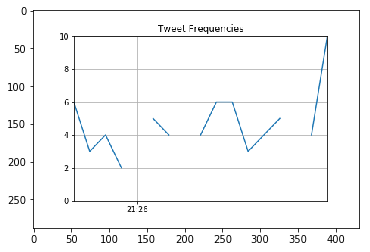

In [11]:
plt.show()

## Sample Data

In [32]:
db.gentags.find_one()

{'_id': ObjectId('5acac4f061c88f1855ae5016'),
 'location': 'Kassel, Hessen',
 'name': 'Firemg93',
 'tag': 'PokÃ©mon',
 'time': '2018-04-07 23:37:54'}

In [34]:
db.tags.find_one()

{'_id': ObjectId('5acac3bd61c88f1855ae454f'),
 'pokemon': 'Bulbasaur',
 'tag': 'bulbasaur'}

In [35]:
db.tweets.find_one()

{'_id': ObjectId('5acabcd961c88f1855ae2bc8'),
 'created_at': datetime.datetime(2018, 4, 7, 22, 7, 8),
 'screenname': 'Nikkowolf',
 'text': 'Oh my frog how freaking cute is he?!? #1 #bulbasaur #pokemongo #washingtondc #wolfonthetownâ\x80¦ https://t.co/Zw6RBeRcnq'}

In [36]:
db.pokemon.find_one()

{'_id': ObjectId('5adb80f361c88f30c6a22b41'),
 'abilityH': 'Chlorophyll',
 'id': 1,
 'species': 'Bulbasaur',
 'total': 318,
 'type1': 'Grass',
 'type2': 'Poison'}

The text is released under the CC-BY-NC-ND license, and code is released under the MIT license.